In [1]:
import pandas as pd
import pickle
from transformers import BertTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [3]:
with open(data_path + "hvg_tokenized.pkl", 'rb') as f:
    contents, summaries = pickle.load(f)

In [4]:
print("Number of articles:", len(contents))

Number of articles: 375736


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
print("Vocabulary size:", tokenizer.vocab_size)

Vocabulary size: 119547


In [6]:
tokens = [token for tokenized_text_ids in [*contents, *summaries] for token in tokenized_text_ids]
print("Number of tokens in corpus:", len(tokens))

Number of tokens in corpus: 134258814


In [7]:
counter = Counter(tokens)
print(f"Used tokens: {len(counter.keys())}/{tokenizer.vocab_size} = {len(counter.keys())/tokenizer.vocab_size * 100:.2f}%")

Used tokens: 39342/119547 = 32.91%


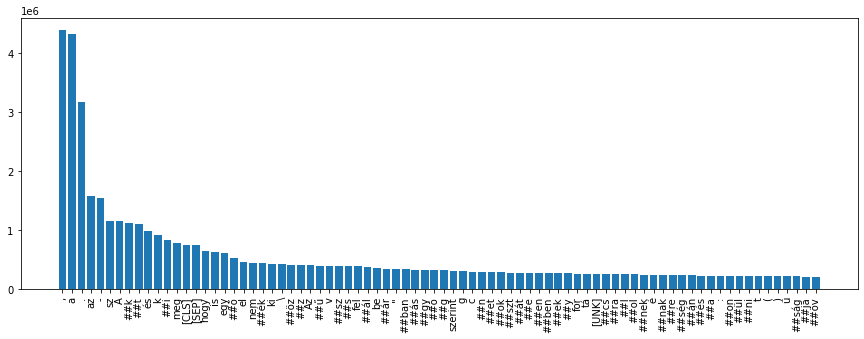

In [8]:
ms = counter.most_common()[:80]

plt.figure(figsize=(15,5))
plt.bar([tokenizer.convert_ids_to_tokens([id])[0] for id, count in ms], [count for id, count in ms]);
plt.xticks(rotation=90)
plt.show()

In [9]:
total_tokens = len(tokens)
total_tokens

134258814

In [10]:
covered = []
tokens_covered = 0
for token_count, (id, count) in enumerate(counter.most_common()):
    tokens_covered += count
    covered.append(tokens_covered / total_tokens)

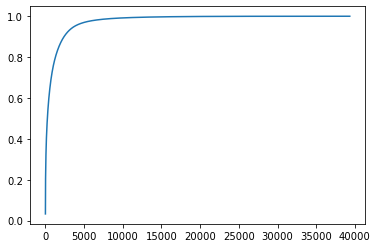

In [11]:
plt.plot(covered);

In [12]:
for i in range(1000, 10001, 1000):
    print(i, covered[i])

1000 0.7539942293844485
2000 0.8728795712436429
3000 0.9281487098493213
4000 0.9555689133377865
5000 0.9698688832451626
6000 0.9782205956325519
7000 0.9835597385807385
8000 0.9872594584367475
9000 0.989927395008867
10000 0.9919087770282256


In [13]:
token_ids = set([0, 100, 101, 102, 103, 104, 105])
for id, count in counter.most_common():
    token_ids.add(id)
    if len(token_ids)>=10000: break

In [14]:
token_ids = sorted(list(token_ids))

In [15]:
with open(data_path + "used_token_ids_10000.pkl", 'wb') as f:
    pickle.dump(token_ids, f)

In [16]:
tokenizer.decode([token_ids[-2]])

'##Ú'

In [18]:
for i in range(0,500):
    print(tokenizer.decode([token_ids[i]]))
print()
for i in range(1, 20):
    print(tokenizer.decode([token_ids[-i]]))

[PAD]
[UNK]
[CLS]
[SEP]
[MASK]
<S>
<T>
!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
0
1
2
3
4
5
6
7
8
9
:
;
=
>
?
@
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
[
\
]
_
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
r
s
t
u
v
w
x
z
©
Á
É
Í
Ó
Ö
Ú
Ü
á
é
í
ó
ö
ü
Ő
ő
Ű
ű
„
•
−
de
the
in
##s
of
la
en
and
##e
##a
to
##n
##i
The
der
un
di
##t
is
el
se
del
##r
und
et
na
##o
was
on
##en
##u
des
den
le
for
da
je
van
as
##m
sa
do
10
an
les
una
il
by
##y
2011
La
at
##l
##d
er
al
##er
von
In
du
with
av
##es
med
##k
2010
est
per
2000
som
por
2012
12
het
from
that
De
no
11
2014
2009
es
20
su
ja
2007
2008
km
##an
2013
15
om
im
com
##ta
2006
dan
##te
18
##na
para
mit
2015
als
El
his
ha
##da
##ing
24
Den
Die
##h
##ne
##g
En
30
##in
##re
14
par
13
16
##us
2005
##de
2016
és
au
25
000
he
##on
2004
em
dem
##ch
19
it
2001
17
til
2002
han
##ia
Le
Il
##le
las
della
New
##ra
##is
si
2003
21
ist
var
are
2017
op
zu
##z
22
für
##et
##os
od
son
An
26
World
##do
##ja
va
ve
1999
##ti
23
##la
##é
II
##ed
Life
za
##to
##se
##ni
##no
or
nel
b